# Nombre: Arturo Lazcano
## RUT: 20.470.051-6

# P2

In [23]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df = pd.read_csv(r'C:\Users\artur\Downloads\Real_estate_database.csv')
no='No'
x1='X1 transaction date'
x2='X2 house age'
x3='X3 distance to the nearest MRT station'
x4='X4 number of convenience stores'
x5='X5 latitude'
x6='X6 longitude'
Y='Y house price of unit area'
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,NaN,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1


In [24]:
# Cantidad de datos inicialmente
print('Cantidad de datos al inicio: ',414*7,'\n')
print('Tipo de datos:\n','\n',df.dtypes)
df

Cantidad de datos al inicio:  2898 

Tipo de datos:
 
 No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores           float64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,NaN,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,NaN,13.7,4082.01500,0.0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9.0,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7.0,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5.0,24.96674,121.54067,52.5


In [25]:
# Eliminar columna x1 pues al analizar datos, es una columna que tiene poca relación con el valor real
# de la casa. También se elimina la columna 'No' pues ya estan los indices y afecta visualmente
# a calculos como df.mean(), df.std(), etc.
df.drop(x1, axis=1, inplace = True)
df.drop(no,axis=1,inplace=True)

# Eliminación de valores NaN
df.dropna(inplace=True)

# Cantidad de datos al quitar filas con datos NaN y tras haer eliminado la columna X1
print('Cantidad de datos sin valores NaN: ', 411*6,'\n')
print('Tipo de datos:\n','\n',df.dtypes)

# Coeficiente de relación de Pearson sin la columna 'No'
corrPearson=df.corr(method='pearson')
corrPearson

Cantidad de datos sin valores NaN:  2466 

Tipo de datos:
 
 X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores           float64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X2 house age,1.000000,0.026968,0.050150,0.053502,-0.049003,-0.210189
X3 distance to the nearest MRT station,0.026968,1.000000,-0.602170,-0.591441,-0.806388,-0.673214
X4 number of convenience stores,0.050150,-0.602170,1.000000,0.444589,0.448466,0.570515
X5 latitude,0.053502,-0.591441,0.444589,1.000000,0.412908,0.546697
X6 longitude,-0.049003,-0.806388,0.448466,0.412908,1.000000,0.521384
Y house price of unit area,-0.210189,-0.673214,0.570515,0.546697,0.521384,1.000000


In [26]:
# Estandarizar los datos:
# caluclo de medias y varianzas para cada columna
(std2,std3,std4,std5,std6,stdy)=(df[x2].std(),df[x3].std(),df[x4].std(),df[x5].std(),df[x6].std(),df[Y].std())
(m2,m3,m4,m5,m6,my)=(df[x2].mean(),df[x3].mean(),df[x4].mean(),df[x5].mean(),df[x6].mean(),df[Y].mean())
#df[x1]=df[x1].apply(lambda x: (x-m1)/std1) , columna eliminada
df[x2]=df[x2].apply(lambda x: (x-m2)/std2)
df[x3]=df[x3].apply(lambda x: (x-m3)/std3)
df[x4]=df[x4].apply(lambda x: (x-m4)/std4)
df[x5]=df[x5].apply(lambda x: (x-m5)/std5)
df[x6]=df[x6].apply(lambda x: (x-m6)/std6)
#df[Y]=df[Y].apply(lambda x: (x-my)/stdy) , posible estandarización de la columna Y
df

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1.253609,-0.787853,1.997528,1.126988,0.444306,37.9
1,0.156135,-0.612617,1.659118,0.914359,0.396721,42.2
3,-0.388212,-0.410767,0.305475,1.487815,0.683536,54.8
4,-1.116935,-0.546248,0.305475,0.836233,0.588365,43.1
5,-0.932559,0.864122,-0.371346,-0.478205,-1.361324,32.1
...,...,...,...,...,...,...
409,-0.353093,2.371330,-1.386578,-2.209850,-1.930391,15.4
410,-1.064256,-0.783445,1.659118,0.430304,0.630736,50.0
411,0.094677,-0.545931,0.982296,0.824958,0.419536,40.6
412,-0.844761,-0.772100,0.305475,-0.181007,0.472336,52.5


In [27]:
#Elegimos data X
X = df.dropna()[[x2,x3,x4,x5,x6]]
y = df.dropna()[Y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=500)
pd.set_option('display.max_rows', 10)

In [28]:
reg = LinearRegression().fit(X_train.dropna(), y_train.dropna()) #Utilizando X_test e y_test definimos el modelo
print("R2 score:" , reg.score(X_train,y_train))#R^2 score 
print("Coeficientes:" , reg.coef_) #Coeficientes de la regresión
print("Hagamos una prediccon:" , reg.predict(X_test)) #predicción del test

R2 score: 0.5494532713445236
Coeficientes: [-3.71515675 -4.46508188  2.73263749  1.85461798  2.19051655]
Hagamos una prediccon: [38.56047745 39.46181498 52.63865477 47.07062301 53.34680003 47.12652643
 47.12756723 26.71719649 42.39153734 36.93505211 51.55666001 34.81700101
 36.51498721 47.07062301 50.12396582 49.08362493 45.49481247 49.14886155
 24.36064903 40.35823054 40.26352615 46.39731008 27.21338797 43.20068632
 43.39639617 46.33338483 46.80573942 11.50927129 44.1748808  47.43416186
 49.84292911 46.70702119 43.30627347 12.00102403 43.29854124 45.18120314
 40.96513496 36.74331537 32.73664946 42.37217164 48.69364381 40.47966747
 40.54244313 46.56040162 46.31210952 51.38774821 16.81638445 44.1748808
 46.39731008 35.48177065 35.12804019 42.10670253 41.14980098 34.78359678
 36.22378994 41.90155309 29.82916054 32.87703484 29.03988317 48.20489497
 30.86170107 40.43377698 33.86567632 51.2063126  36.99690712 42.8389085
 33.14476057 30.45910313 42.31888546 41.44188755 52.12994603 40.8536413

In [29]:
# Regresión Lineal manual
# creación de matrices X, X^T, (XX^T)^-1 e Y
def matriz(col):
    arr=[[]]
    for e in col:
        arr[0].append(e)
    return arr

ones=np.full((1, 309), 1)   # el valor 309 depende del test_size
aux2=matriz(X_test.sort_index()[x2])    
aux3=matriz(X_test.sort_index()[x3])      
aux4=matriz(X_test.sort_index()[x4])     
aux5=matriz(X_test.sort_index()[x5])        
aux6=matriz(X_test.sort_index()[x6])        
coly=[]
for y in y_test.sort_index():
    coly.append([y])


C=np.concatenate((ones,aux2,aux3,aux4,aux5,aux6),axis=0)
CT=C.transpose()
mult=np.matmul(C, CT)
invmult=np.linalg.inv(mult)
binicial=np.matmul(invmult, C)
# b es el vector con coeficientes (W visto en clases)
b=np.matmul(binicial,coly)
# función para predecir un valor de una casa dados sus datos
def formula(b,filaX):
    pred=b[0][0]
    for i in range(0,len(filaX)):
        pred+=(b[i+1][0]*filaX[i])
    return pred
# bb es el vector de coeficientes entregado por las funciones de sklearn
bb=[[0],[0.2556013],[-0.25734716], [-0.52962379], [0.20078868],[0.12319737], [-0.05867072]]
# predicciones hechas manualmente
predicciones=[]
for x in CT:
    xnuevo=np.delete(x,0)
    predicciones.append(formula(b,xnuevo))
    
# predicciones de sklearn
prediccionesSK=reg.predict(X_test)

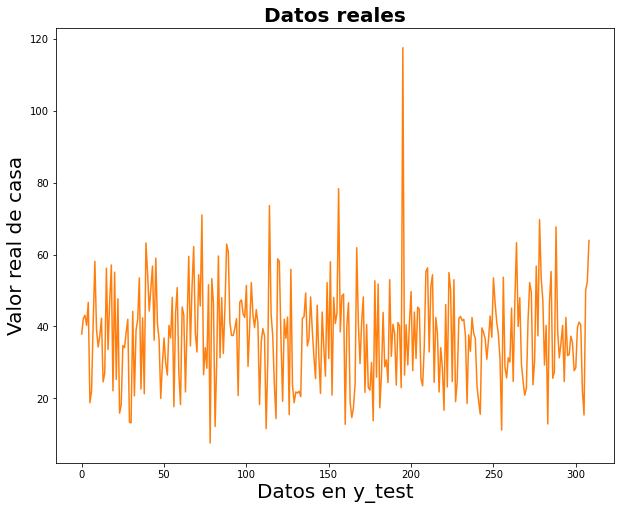

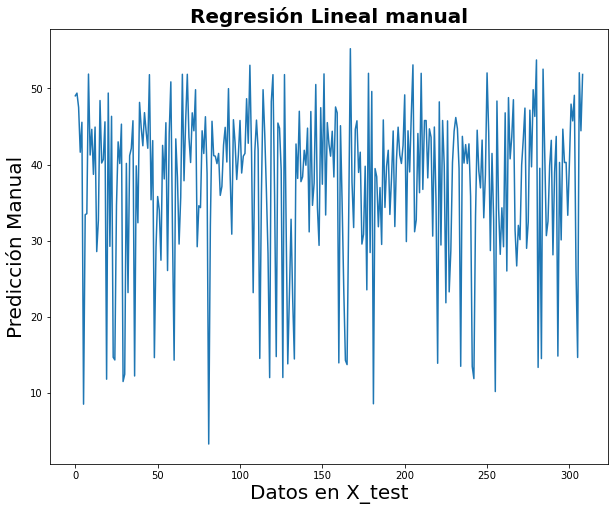

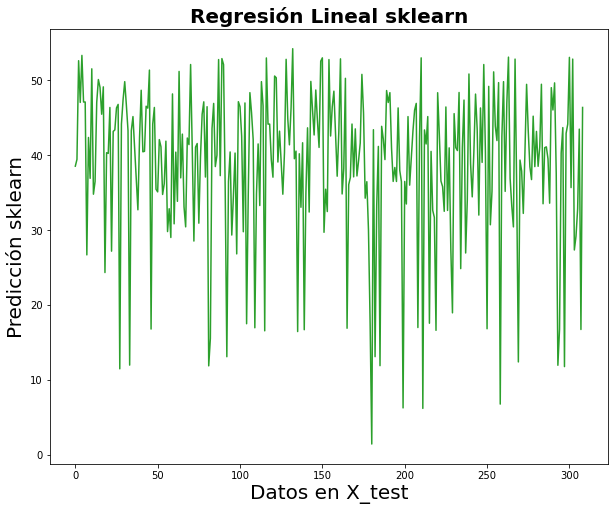

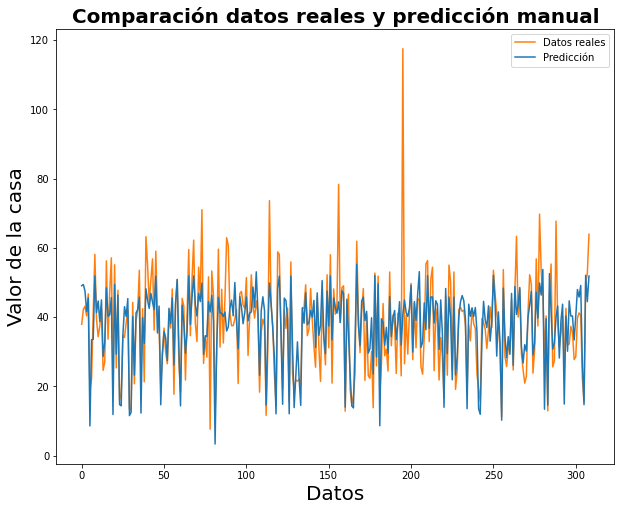

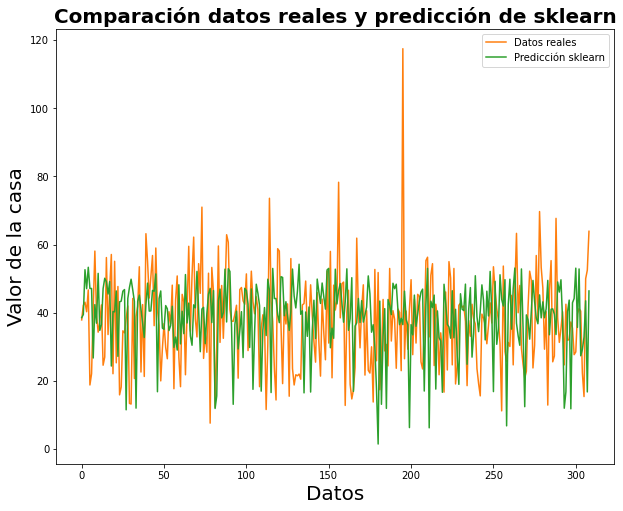

In [30]:
#GRAFICOS

plt.figure()
ejex=np.arange(0, 309, 1) 
plt.plot(ejex,y_test.sort_index(),'C1')
plt.title('Datos reales',fontsize=20, fontweight='bold')
plt.xlabel('Datos en y_test',fontsize=20)
plt.ylabel('Valor real de casa',fontsize=20)

plt.figure()
plt.plot(ejex,predicciones)
plt.rcParams['figure.figsize'] = (10, 8)
plt.title('Regresión Lineal manual',fontsize=20, fontweight='bold')
plt.xlabel('Datos en X_test',fontsize=20)
plt.ylabel('Predicción Manual',fontsize=20)

plt.figure()
ejex2=np.arange(0, 309, 1) 
plt.plot(ejex2,prediccionesSK,'C2')
plt.title('Regresión Lineal sklearn',fontsize=20, fontweight='bold')
plt.xlabel('Datos en X_test',fontsize=20)
plt.ylabel('Predicción sklearn',fontsize=20)

plt.figure()
plt.plot(ejex,y_test.sort_index(),'C1',label='Datos reales')
plt.plot(ejex,predicciones,label='Predicción')
plt.title('Comparación datos reales y predicción manual',fontsize=20, fontweight='bold')
plt.xlabel('Datos',fontsize=20)
plt.ylabel('Valor de la casa',fontsize=20)
plt.legend()

plt.figure()
plt.plot(ejex,y_test.sort_index(),'C1',label='Datos reales')
plt.plot(ejex2,prediccionesSK,'C2',label='Predicción sklearn')
plt.title('Comparación datos reales y predicción de sklearn',fontsize=20, fontweight='bold')
plt.xlabel('Datos',fontsize=20)
plt.ylabel('Valor de la casa',fontsize=20)
plt.legend()

plt.show()

# P3

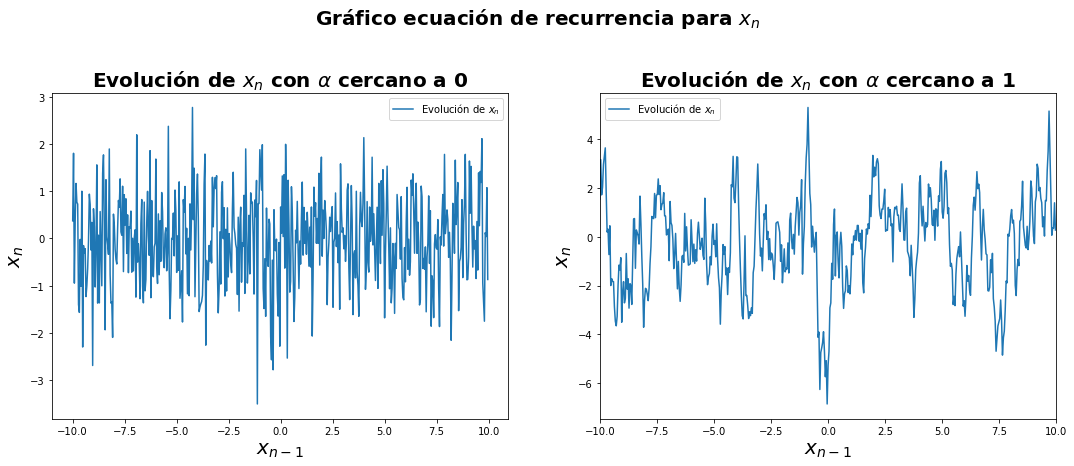

In [31]:
# creación de distribuciones normales y ecuación de recurrencia para X_n
xn=norm.rvs(size=1)
alpha1=0.1 # distintos alphas para ver la diferencia en los gráficos
alpha2=0.9
vn=norm.rvs(size=500)
xn1=[]
xn2=[]
xn1.append(xn*alpha1 + vn[0])
xn2.append(xn*alpha2 + vn[0])
for i in range(1,500):
    xn1.append(xn1[i-1]*alpha1 + vn[i])
for i in range(1,500):
    xn2.append(xn2[i-1]*alpha2 + vn[i])
    
un=norm.rvs(size=500)
zn=[]
for i in range(0,500):
    zn.append(xn1[i]+un[i])

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(18,6))
fig.suptitle(r'Gráfico ecuación de recurrencia para $x_n$',y=1.08,fontsize=20,fontweight='bold')
x_all = np.arange(-10, 10, 0.04)
ax1.plot(x_all,xn1,label=r'Evolución de $x_n$')
ax1.set_xlabel(r'$x_{n-1}$',fontsize=20)
ax1.set_ylabel(r'$x_n$',fontsize=20)
ax1.set_title(r'Evolución de $x_n$ con $\alpha$ cercano a 0',fontsize=20, fontweight='bold')
ax1.legend()
ax2.plot(x_all, xn2,label=r'Evolución de $x_n$')
ax2.set_xlabel(r'$x_{n-1}$',fontsize=20)
ax2.set_ylabel(r'$x_n$',fontsize=20)
ax2.set_title(r'Evolución de $x_n$ con $\alpha$ cercano a 1',fontsize=20, fontweight='bold')
ax2.set_xlim([-10,10])
ax2.legend()
plt.show()

In [32]:
plt.rcParams['figure.figsize'] = (10, 8)
# Parametros iniciales - Generando datos
n_iter = 500
sz = (n_iter,) # Tamaño del arreglo
z=xn2 
zz=zn
Q = 1 # process variance
#Vamos a aproximar la señal usando el Filtro de Kalman 
xhat=np.zeros(sz)      # Estimacion a posteriori de x
P=np.zeros(sz)         # Estimacion a posteriori del error
xhatminus=np.zeros(sz) # Estimacion a priori de x
Pminus=np.zeros(sz)    # Estimacion a priori del error
K=np.zeros(sz)         # Matriz de Kalman o de Ganancia
R = 1 # Estimacion de la varianza de la medicion
# Cuanto creemos que valen (Están ocultos)
xhat[0] = 1 
P[0] = 1.0
alpha=0.95
for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]*alpha
    Pminus[k] = (alpha**2)*P[k-1]+Q
    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

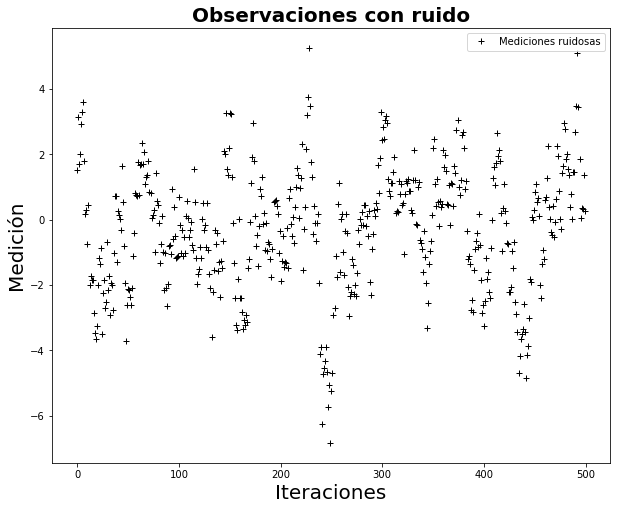

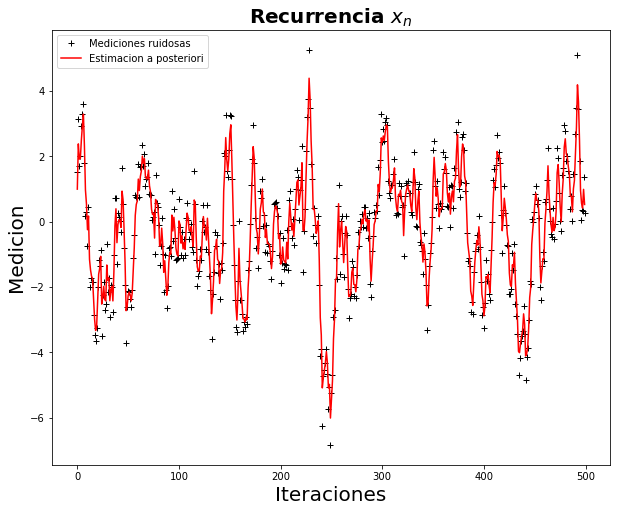

In [33]:
#gráficos de distintas mediciones
plt.figure()
plt.plot(z,'k+',label='Mediciones ruidosas')
plt.legend()
plt.title('Observaciones con ruido',fontsize=20, fontweight='bold')
plt.xlabel('Iteraciones',fontsize=20)
plt.ylabel('Medición',fontsize=20)

plt.figure()
plt.plot(z,'k+',label='Mediciones ruidosas')
plt.plot(xhat,'r-',label='Estimacion a posteriori')
plt.legend()
plt.title(r'Recurrencia $x_n$',fontsize=20,fontweight='bold')
plt.xlabel('Iteraciones',fontsize=20)
plt.ylabel('Medicion',fontsize=20)

plt.show()

Text(0, 0.5, 'Medicion')

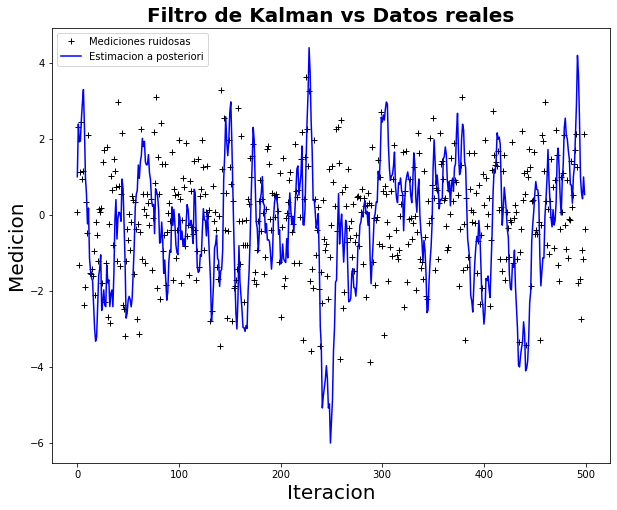

In [34]:
plt.figure()
plt.plot(zz,'k+',label='Mediciones ruidosas')
plt.plot(xhat,'b-',label='Estimacion a posteriori')
plt.legend()
plt.title('Filtro de Kalman vs Datos reales',fontsize=20, fontweight='bold')
plt.xlabel('Iteracion',fontsize=20)
plt.ylabel('Medicion',fontsize=20)